In [ ]:
!pip install pymssql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 7.4 MB/s 


In [ ]:
import pandas as pd
import pymssql
import matplotlib.pyplot as plt

In [ ]:
conn = pymssql.connect(server ='213.140.22.237\SQLEXPRESS',user='ghebrous.davide',password='xxx123##',database='ghebrous.davide')

In [ ]:
query = 'SELECT * FROM production.products'
df = pd.read_sql(query,conn)

In [ ]:
df.head(10)

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99
5,6,Surly Ice Cream Truck Frameset - 2016,8,6,2016,469.99
6,7,Trek Slash 8 27.5 - 2016,9,6,2016,3999.99
7,8,Trek Remedy 29 Carbon Frameset - 2016,9,6,2016,1799.99
8,9,Trek Conduit+ - 2016,9,5,2016,2999.99
9,10,Surly Straggler - 2016,8,4,2016,1549.00


**numero di prodotti per ogni anno**

In [ ]:
query = 'select model_year,count(*) as numero_prodotti from production.products group by model_year '
df = pd.read_sql(query,conn)
df

,model_year,numero_prodotti
0,2016,26
1,2017,85
2,2018,204
3,2019,6


**collegarsi al database bikestore ed estrarre le seguenti informazioni**


1.   il numero di prodotti per ogni categoria,*sia in formate tabellare, sia sotto froma di grafico a barre verticale*

2.   il numero di ordini per ogni store,*sia in formato tabellare, sia totto forma di grafico a barre orizzontali*
3.   Numero di prodotti per ogni brand, *sia in formato tabellare, sia totto forma di grafico a torta*


**salvare tutte le informazioni su un file pdf.**

# Numero 1:il numero di prodotti per ogni categoria,sia in formate tabellare, sia sotto froma di grafico a barre verticale

In [ ]:
query = 'select category_name,count(*) as numero_prodotti from production.products inner join production.categories on products.category_id = categories.category_id group by category_name'
df = pd.read_sql(query,conn)
df

,category_name,numero_prodotti
0,Children Bicycles,59
1,Comfort Bicycles,30
2,Cruisers Bicycles,78
3,Cyclocross Bicycles,10
4,Electric Bikes,24
5,Mountain Bikes,60
6,Road Bikes,60


<BarContainer object of 7 artists>

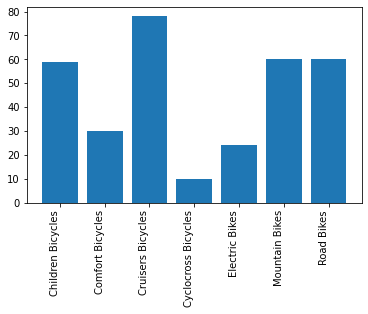

In [ ]:
fig = plt.figure()
ax = plt.axes()
fig.autofmt_xdate(rotation='vertical')
ax.bar(df.category_name,df.numero_prodotti)

# Numero 2: il numero di ordini per ogni store,sia in formato tabellare, sia totto forma di grafico a barre orizzontali

In [ ]:
query = 'select store_name,count(*) as numero_ordini from sales.orders inner join sales.stores on stores.store_id = orders.store_id group by store_name'
df = pd.read_sql(query,conn)
df

,store_name,numero_ordini
0,Baldwin Bikes,1093
1,Rowlett Bikes,174
2,Santa Cruz Bikes,348


<BarContainer object of 3 artists>

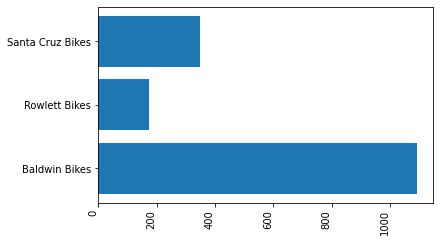

In [ ]:
fig = plt.figure()
ax = plt.axes()
fig.autofmt_xdate(rotation='vertical')
ax.barh(df.store_name,df.numero_ordini)

# Numero 3:Numero di prodotti per ogni brand, sia in formato tabellare, sia totto forma di grafico a torta

In [ ]:
query = 'select brand_name,count(*) as numero_prodotti from production.products inner join production.brands on products.brand_id = brands.brand_id group by brand_name'
df = pd.read_sql(query,conn)
df.to_html()
df

,brand_name,numero_prodotti
0,Electra,118
1,Haro,10
2,Heller,3
3,Pure Cycles,3
4,Ritchey,1
5,Strider,3
6,Sun Bicycles,23
7,Surly,25
8,Trek,135


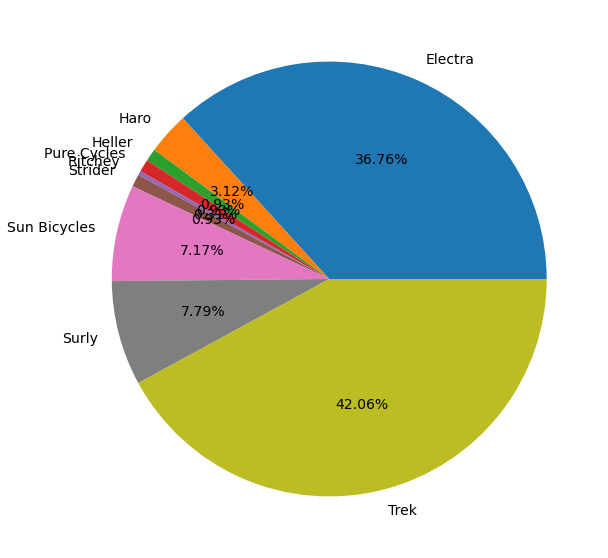

In [ ]:
perc = df['numero_prodotti']

plt.rcParams.update({'font.size':14})

fig = plt.figure(figsize = [10,10])
ax = plt.axes()

ax.pie(perc, labels=df['brand_name'],autopct='%1.2f%%')

plt.show()

# pdf2

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

In [ ]:
pp = PdfPages("foo.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

# Esercizio: scrivere un programma per avere tutte le informazioni riguardanti un prodotto. L'utente inserisce l'id del prodotto e il programma restituisce tutte le informazioni.

In [ ]:
id = input(' inserire l\'id del prodotto desiderato: ')
query = "select * from production.products where product_id = " + id
print(query)
df_id = pd.read_sql(query,conn)
df_id

 inserire l'id del prodotto desiderato: 30
select * from production.products where product_id = 30


,product_id,product_name,brand_id,category_id,model_year,list_price
0,30,Surly Ice Cream Truck Frameset - 2017,8,6,2017,999.99
